<a href="https://colab.research.google.com/github/DataDoggo215/Predicting_BitcoinPrices/blob/main/BitPredict_time_series_forecastng(2)test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Will Bitcoin prices remain on the downward trend or will it go back up?

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://finance.yahoo.com/quote/BTC-USD/. I downloaded the price data and uploaded it to my google drive in a csv format.

#1.&nbsp;Exploratory Data Analysis

In [204]:
#Mount to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [205]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv('/content/gdrive/MyDrive/BTC_prices.csv',
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [206]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-23,69121.30469,70041.27344,66356.95313,67929.56250,67929.56250,4.189568e+10
2024-05-24,67928.13281,69220.29688,66622.67188,68526.10156,68526.10156,2.919731e+10
2024-05-25,68526.92188,69579.32031,68515.82031,69265.94531,69265.94531,1.547307e+10
2024-05-26,69264.28906,69506.22656,68183.89063,68518.09375,68518.09375,1.562843e+10
2024-05-28,69382.22656,69444.91406,67505.41406,67865.85156,67865.85156,2.938953e+10


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3541 entries, 2014-09-17 to 2024-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3541 non-null   float64
 1   High       3541 non-null   float64
 2   Low        3541 non-null   float64
 3   Close      3541 non-null   float64
 4   Adj Close  3541 non-null   float64
 5   Volume     3541 non-null   float64
dtypes: float64(6)
memory usage: 193.6 KB


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3541 entries, 2014-09-17 to 2024-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3541 non-null   float64
 1   High       3541 non-null   float64
 2   Low        3541 non-null   float64
 3   Close      3541 non-null   float64
 4   Adj Close  3541 non-null   float64
 5   Volume     3541 non-null   float64
dtypes: float64(6)
memory usage: 193.6 KB


In [209]:
len(df)

3541

In [210]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Adj Close"]).rename(columns={"Adj Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


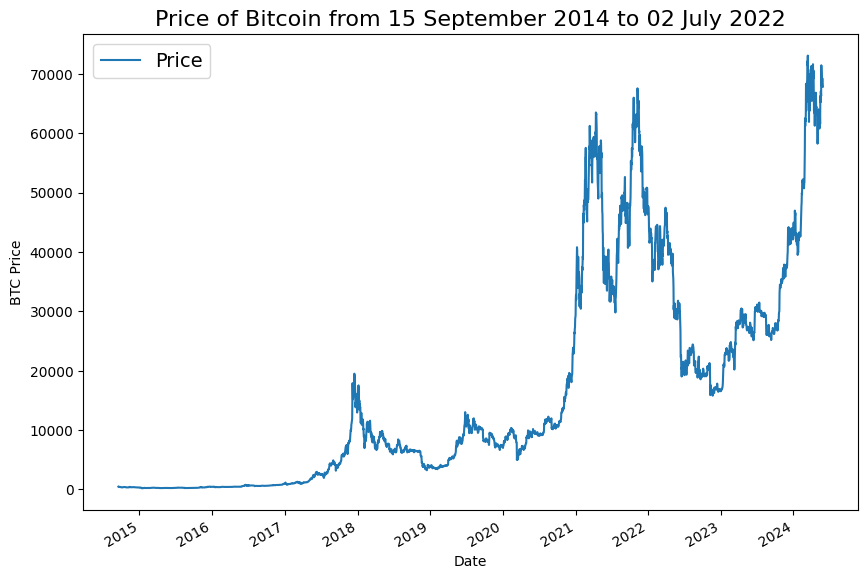

In [211]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 15 September 2014 to 02 July 2022", fontsize=16)
plt.legend(fontsize=14);

Importing time series data with Python's CSV module

In [212]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/gdrive/My Drive/BTC_prices.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[5])) # get the adj closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

ValueError: time data '9/17/2014' does not match format '%Y-%m-%d'

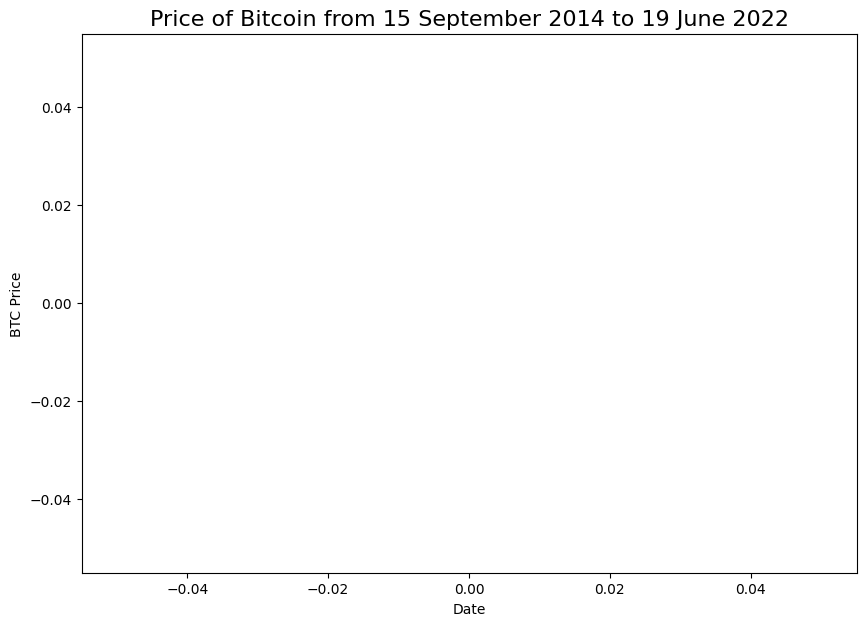

In [213]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 15 September 2014 to 19 June 2022", fontsize=16)
plt.xlabel("Date");

**Format data part 1: Create train and test sets of our time series data**

⚠ Wrong Way to do it!

In [214]:
bitcoin_prices[:5]

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [215]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [216]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2832,), (709,), (2832,), (709,))

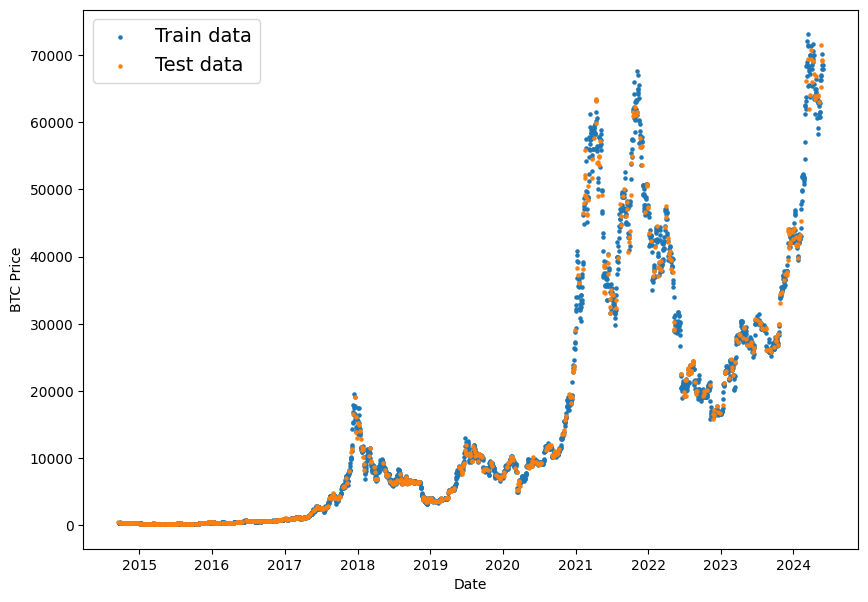

In [217]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

✅ Correct way to do split

In [218]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2832, 709, 2832, 709)

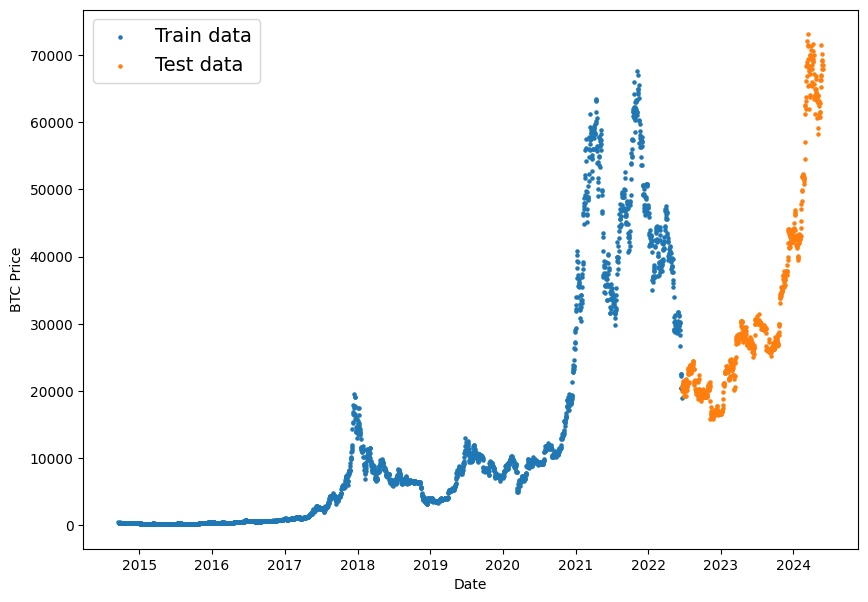

In [219]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Let's create a plotting function so we don't have to do it each time.

In [220]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

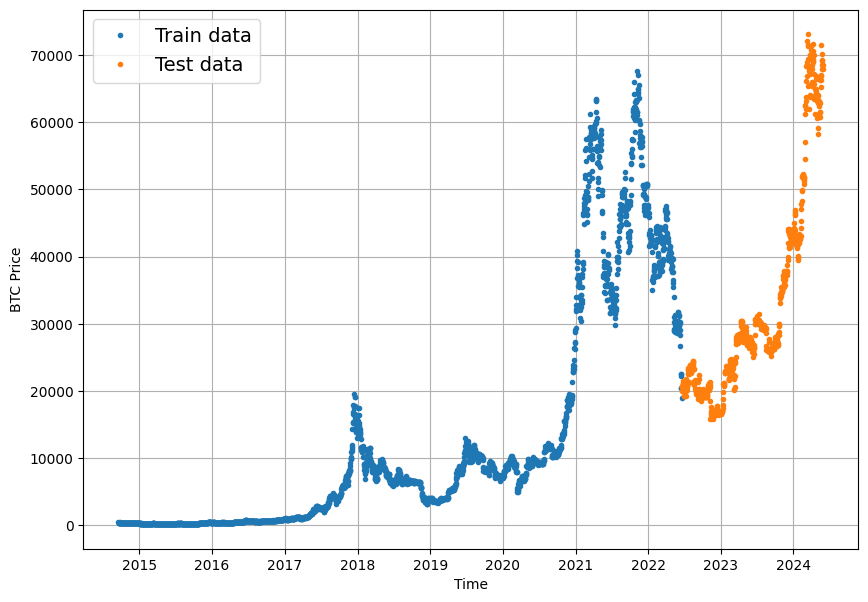

In [221]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

#2.&nbsp;Modeling

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Horizon = number of timesteps into the future we're going to predict

Window size = number of timesteps we're going to use to predict horizon

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

Modelling experiments we're running:

*   0 Naïve model (baseline)
*   1 Dense model, horizon = 1, window = 7
*   2 Same as 1, horizon = 1, window = 30
*   3 Same as 1, horizon = 7, window = 30
*   4 Conv1D
*   5 LSTM
*   6 Same as 1 (but with multivariate data)
*   7 N-BEATs Algorithm
*   8 Ensemble (multiple models optimized on different loss functions)
*   9 Future prediction model (model to predict future values)
*   10 Same as 1 (but with turkey 🦃 data introduced)

##2a.&nbsp; Model 0: Naive forecast (baseline)

In [222]:
y_test[:10]

array([20553.27148, 20599.53711, 20710.59766, 19987.0293 , 21085.87695,
       21231.65625, 21502.33789, 21027.29492, 20735.47852, 20280.63477])

In [223]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([20553.27148, 20599.53711, 20710.59766, 19987.0293 , 21085.87695,
        21231.65625, 21502.33789, 21027.29492, 20735.47852, 20280.63477]),
 array([67051.875  , 66940.80469, 66278.36719, 71448.19531, 70136.53125,
        69122.33594, 67929.5625 , 68526.10156, 69265.94531, 68518.09375]))

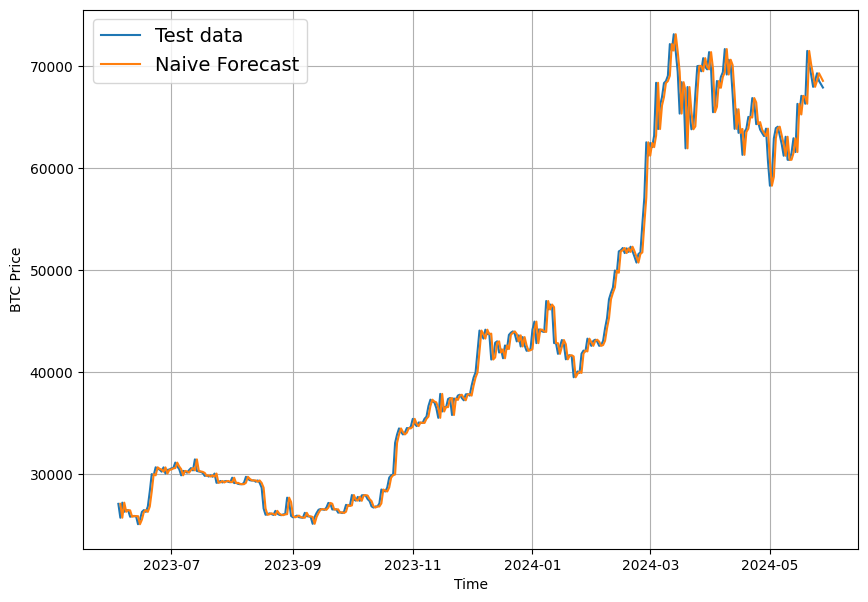

In [224]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

**Time Series Model Evaluation**

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

A few common regression metrics (which can also be used for time series forecasting):

*   MAE - mean absolute error
*   MSE - mean squared error
*   RMSE - root mean square error
*   MAPE/sMAPE - (symmetric) mean absolute percentage error
*   MASE - mean absolute scaled error

In [225]:
import tensorflow as tf

In [226]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [227]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9986947152740714

In [228]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [229]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 609.0984,
 'mse': 1041347.44,
 'rmse': 1020.4643,
 'mape': 1.7716961,
 'mase': 0.9986947}

In [230]:
naive_forecast[-10:]

array([67051.875  , 66940.80469, 66278.36719, 71448.19531, 70136.53125,
       69122.33594, 67929.5625 , 68526.10156, 69265.94531, 68518.09375])

In [231]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=32441.855662002818>

In [232]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=15787.28418>,
 <tf.Tensor: shape=(), dtype=float64, numpy=73083.5>)

Resource for other time series forecasting modeling: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

**Creating windows for our dataset**

We window our time series dataset to turn our data into a supervised learning problem.

In [233]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

IndexError: list index out of range

In [234]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [235]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [236]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We could create a a python loop to create windows for our entire data set, but there are better methods for larger data. To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html. We could also do something similiar with keras: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [237]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [238]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3534, 3534)

In [240]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


In [241]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [66940.80469 66278.36719 71448.19531 70136.53125 69122.33594 67929.5625
 68526.10156] -> Label: [69265.94531]
Window: [66278.36719 71448.19531 70136.53125 69122.33594 67929.5625  68526.10156
 69265.94531] -> Label: [68518.09375]
Window: [71448.19531 70136.53125 69122.33594 67929.5625  68526.10156 69265.94531
 68518.09375] -> Label: [67865.85156]


**Turning windows into training and test sets**

In [242]:
full_windows[:5], full_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [243]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [244]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2827, 707, 2827, 707)

In [245]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]),
 array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [246]:
test_windows[:5], test_labels[:5]

(array([[22206.79297, 22572.83984, 20381.65039, 20471.48242, 19017.64258,
         20553.27148, 20599.53711],
        [22572.83984, 20381.65039, 20471.48242, 19017.64258, 20553.27148,
         20599.53711, 20710.59766],
        [20381.65039, 20471.48242, 19017.64258, 20553.27148, 20599.53711,
         20710.59766, 19987.0293 ],
        [20471.48242, 19017.64258, 20553.27148, 20599.53711, 20710.59766,
         19987.0293 , 21085.87695],
        [19017.64258, 20553.27148, 20599.53711, 20710.59766, 19987.0293 ,
         21085.87695, 21231.65625]]),
 array([[20710.59766],
        [19987.0293 ],
        [21085.87695],
        [21231.65625],
        [21502.33789]]))

In [247]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [248]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

##2b.&nbsp; Model 1: Dense model (window = 7, horizon = 1)

In [249]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
23/23 [==============================] - 2s 42ms/step - loss: 1761.3357 - mae: 1761.3357 - mse: 14671543.0000 - val_loss: 2172.4702 - val_mae: 2172.4702 - val_mse: 8987406.0000
Epoch 2/100
23/23 [==============================] - 1s 30ms/step - loss: 880.4131 - mae: 880.4131 - mse: 3446412.0000 - val_loss: 1341.8013 - val_mae: 1341.8013 - val_mse: 4064737.5000
Epoch 3/100
23/23 [==============================] - 1s 34ms/step - loss: 793.0278 - mae: 793.0278 - mse: 2850394.2500 - val_loss: 1315.4037 - val_mae: 1315.4037 - val_mse: 4020541.5000
Epoch 4/100
23/23 [==============================] - 1s 34ms/step - loss: 764.9504 - mae: 764.9504 - mse: 2613707.0000 - val_loss: 1203.9967 - val_mae: 1203.9967 - val_mse: 3306816.7500
Epoch 5/100
23/23 [==============================] - 1s 32ms/step - loss: 717.8912 - mae: 717.8912 - mse: 2342131.7500 - val_loss: 1151.0044 - val_mae: 1151.0044 - val_mse: 3001034.5000
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - 

In [250]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 8ms/step - loss: 720.1848 - mae: 720.1848 - mse: 1270820.8750


[720.184814453125, 720.184814453125, 1270820.875]

In [251]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

23/23 [==============================] - 1s 8ms/step - loss: 603.7318 - mae: 603.7318 - mse: 1037410.5625


[603.7318115234375, 603.7318115234375, 1037410.5625]

**Making forecasts with a model (on the test dataset)**

In [252]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [253]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

23/23 [==============================] - 0s 2ms/step


(707,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([20526.602, 20617.898, 20116.988, 20855.623, 21231.064, 21499.02 ,
        21109.953, 20737.326, 20378.523, 20124.16 ], dtype=float32)>)

In [254]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([707]), TensorShape([707]))

In [255]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 603.73175,
 'mse': 1037410.7,
 'rmse': 1018.53357,
 'mape': 1.771708,
 'mase': 0.9887499}

In [256]:
naive_results

{'mae': 609.0984,
 'mse': 1041347.44,
 'rmse': 1020.4643,
 'mape': 1.7716961,
 'mase': 0.9986947}

In [257]:
test_labels.shape

(707, 1)

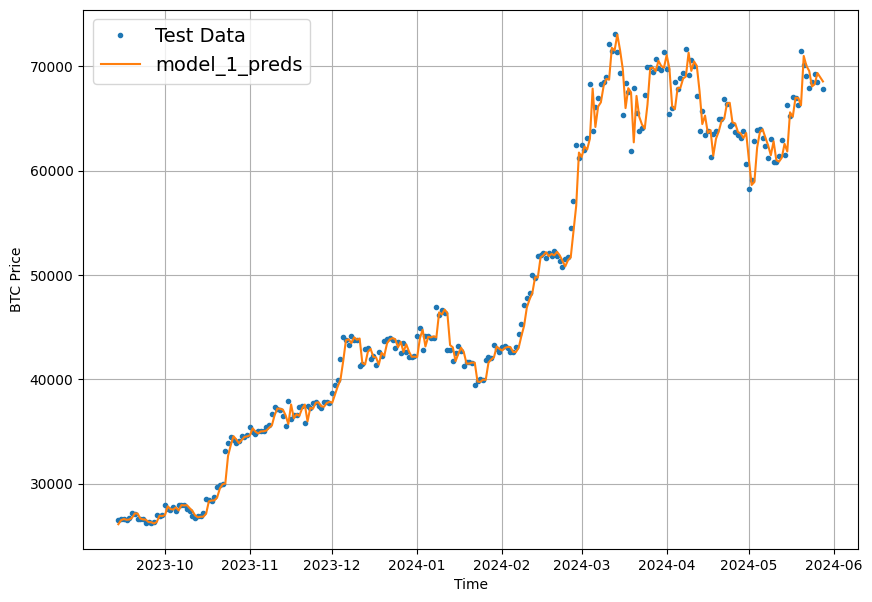

In [258]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

##2c.&nbsp; Model 2: Dense (window = 30, horizon = 1)

In [259]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [260]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3511, 3511)

In [261]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2808, 703, 2808, 703)

In [262]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [263]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 729.2413


729.2413330078125

In [264]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 645.7557


645.7557373046875

In [265]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

22/22 [==============================] - 0s 2ms/step


In [266]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([703]), TensorShape([703]))

In [267]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 645.75574,
 'mse': 1067524.1,
 'rmse': 1033.2106,
 'mape': 1.9251897,
 'mase': 1.0570719}

In [268]:
model_1_results

{'mae': 603.73175,
 'mse': 1037410.7,
 'rmse': 1018.53357,
 'mape': 1.771708,
 'mase': 0.9887499}

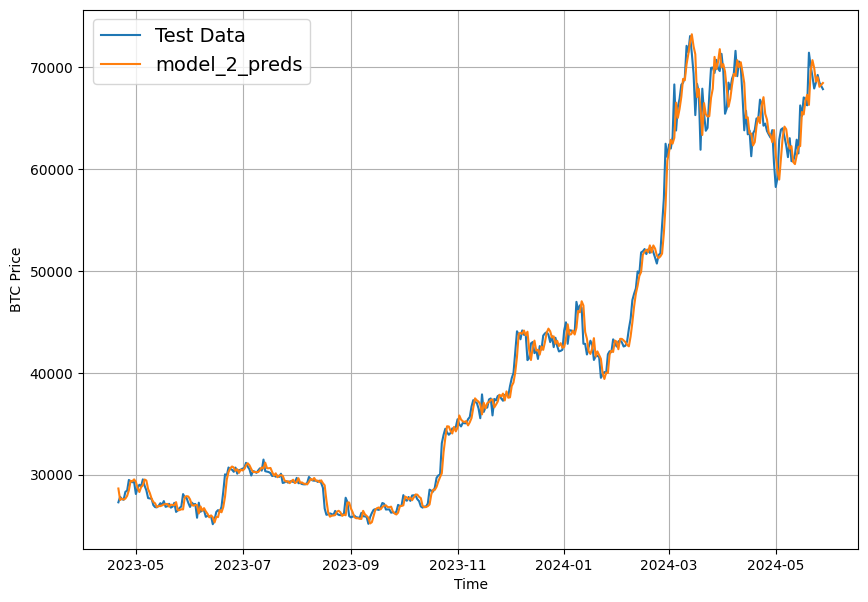

In [269]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

##2d.&nbsp; Model 3: Dense (window = 30, horizon = 7)

In [270]:
prices[:10]

array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985, 423.204987, 411.574005, 404.424988])

In [271]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3505, 3505)

In [272]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2804, 701, 2804, 701)

In [273]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [274]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1302.1461


1302.1461181640625

In [275]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1258.3013


1258.30126953125

In [276]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[20779.81 , 20464.021, 20551.066, 21234.182, 20884.428, 21282.348,
        20575.24 ],
       [21391.047, 20859.65 , 20696.664, 21530.389, 22101.555, 21121.43 ,
        21142.502],
       [21483.523, 20440.44 , 20580.234, 20998.6  , 21386.912, 20988.225,
        20557.541],
       [20918.39 , 20536.646, 20791.475, 20640.193, 21907.549, 21294.672,
        20739.867],
       [21768.316, 22054.963, 21897.393, 20199.545, 21897.963, 20724.61 ,
        21174.162]], dtype=float32)>

In [277]:
model_2_results

{'mae': 645.75574,
 'mse': 1067524.1,
 'rmse': 1033.2106,
 'mape': 1.9251897,
 'mase': 1.0570719}

In [278]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([701, 7]), TensorShape([703]), TensorShape([707]))

In [279]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 302.39175 ,  645.0522  ,  564.60046 ,  768.9665  , 1025.0382  ,
        1742.3685  , 1142.219   , 1264.9069  , 1178.5154  ,  551.0985  ,
         972.28656 ,  945.91266 , 1645.0065  , 1538.3342  , 1209.3878  ,
        1055.7832  ,  714.37665 ,  655.38617 ,  796.43555 , 1152.6339  ,
         771.42804 ,  814.8482  , 1609.4576  , 1940.6682  , 1896.7891  ,
        1492.5156  , 1551.8292  , 1690.1517  ,  876.28375 ,  604.97906 ,
        1039.7943  , 1198.7341  , 1044.5441  ,  981.78156 ,  869.4771  ,
        1350.6473  , 1738.3064  , 1035.6083  ,  454.7059  , 1120.6506  ,
        1054.1029  ,  844.6325  ,  710.09906 ,  399.03265 ,  570.18164 ,
         598.33624 ,  547.786   ,  545.6476  ,  532.83984 ,  564.93835 ,
         358.887   ,  368.15652 ,  460.40512 , 1187.8287  , 1710.9408  ,
        2046.1945  , 2410.8716  , 2185.5105  , 1930.2737  , 2189.8694  ,
         692.71375 ,  600.64484 ,  807.1412  ,  905.90594 , 1013.72235 ,
        1262.8392  , 1517.7966  , 1026.767  

**Make our evaluation function work for larger horizons**

In [280]:
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1258.3013


1258.30126953125

In [281]:
tf.reduce_mean(model_3_results["mae"]).numpy()

1258.3013

In [282]:
model_2_results["mae"].ndim

0

In [283]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [284]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1258.3013,
 'mse': 3800181.5,
 'rmse': 1448.8553,
 'mape': 3.8023226,
 'mase': 2.0625708}

In [285]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[20779.81 , 20464.021, 20551.066, 21234.182, 20884.428, 21282.348,
        20575.24 ],
       [21391.047, 20859.65 , 20696.664, 21530.389, 22101.555, 21121.43 ,
        21142.502],
       [21483.523, 20440.44 , 20580.234, 20998.6  , 21386.912, 20988.225,
        20557.541],
       [20918.39 , 20536.646, 20791.475, 20640.193, 21907.549, 21294.672,
        20739.867],
       [21768.316, 22054.963, 21897.393, 20199.545, 21897.963, 20724.61 ,
        21174.162]], dtype=float32)>

In [286]:
test_labels[:]

array([[20710.59766, 19987.0293 , 21085.87695, ..., 21502.33789,
        21027.29492, 20735.47852],
       [19987.0293 , 21085.87695, 21231.65625, ..., 21027.29492,
        20735.47852, 20280.63477],
       [21085.87695, 21231.65625, 21502.33789, ..., 20735.47852,
        20280.63477, 20104.02344],
       ...,
       [66278.36719, 71448.19531, 70136.53125, ..., 67929.5625 ,
        68526.10156, 69265.94531],
       [71448.19531, 70136.53125, 69122.33594, ..., 68526.10156,
        69265.94531, 68518.09375],
       [70136.53125, 69122.33594, 67929.5625 , ..., 69265.94531,
        68518.09375, 67865.85156]])

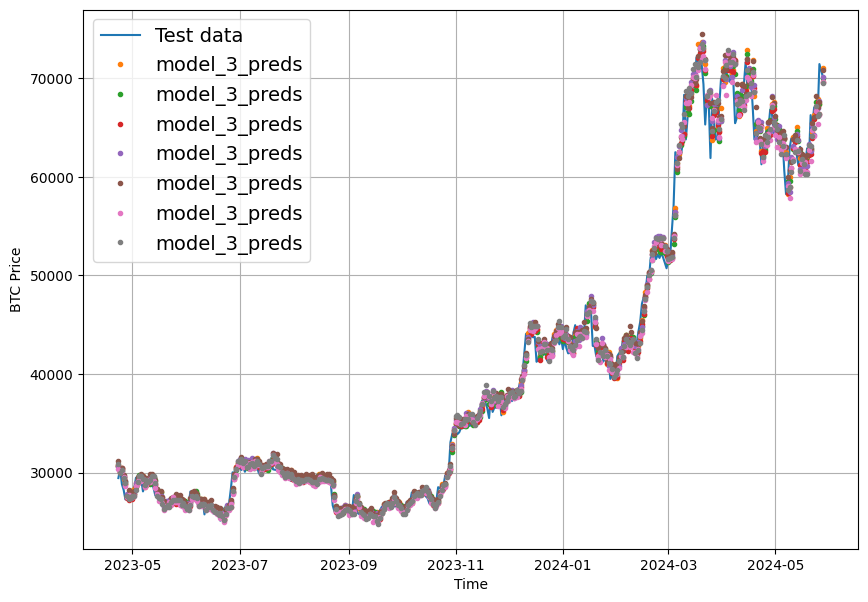

In [287]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [288]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([20779.81 , 20464.021, 20551.066, 21234.182, 20884.428, 21282.348,
       20575.24 ], dtype=float32)>

In [289]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=20824.441>

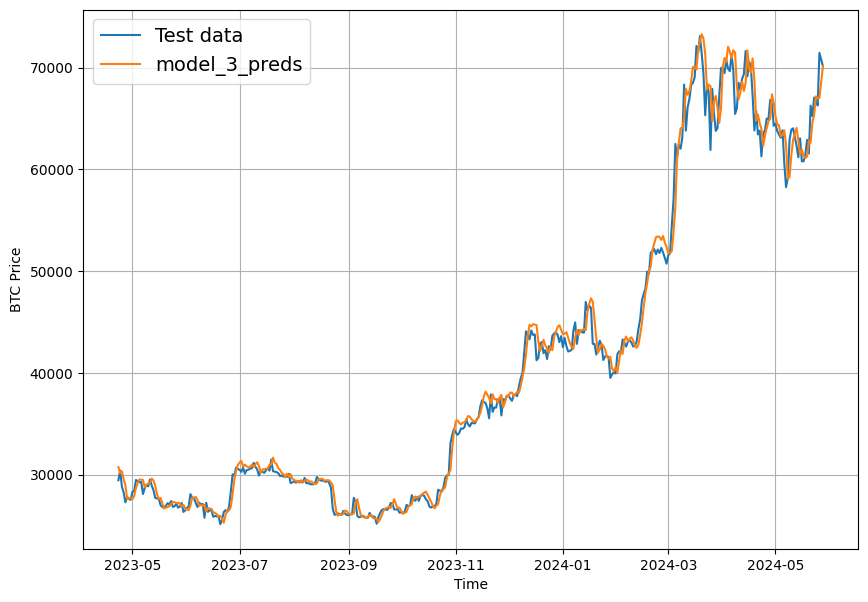

In [290]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds")

**Which model is performing the best?**

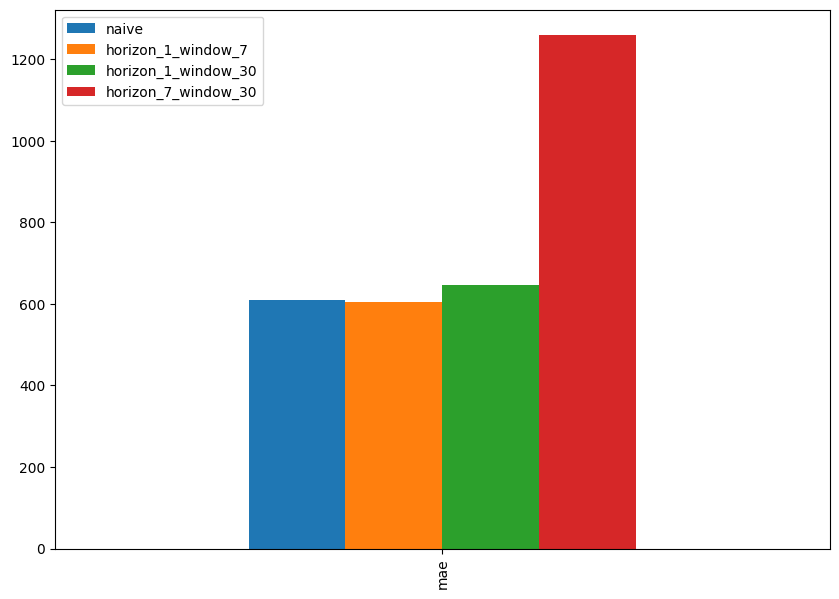

In [291]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


Naive so far seems to be doing the best. This could be due to the pressence of autocorrelation in the data.  For more on how autocorrelation influences a model's predictions, see the article: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

##2e.&nbsp; Model 4: Conv1D

In [292]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [293]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3534, 3534)

In [294]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2827, 2827, 707, 707)

In [295]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

To use the Conv1D layer, we need an input shape of: (batch_size, timesteps, input_dim)...

However our data isn't in that shape yet...

In [296]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [297]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [298]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [299]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
23/23 [==============================] - 2s 53ms/step - loss: 8658.1250 - val_loss: 5782.1240
Epoch 2/100
23/23 [==============================] - 1s 39ms/step - loss: 1138.4102 - val_loss: 1842.8303
Epoch 3/100
23/23 [==============================] - 1s 27ms/step - loss: 736.3802 - val_loss: 1100.2322
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 703.4086 - val_loss: 1123.1638
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 662.2440 - val_loss: 1136.6731
Epoch 6/100
23/23 [==============================] - 1s 24ms/step - loss: 639.1204 - val_loss: 1036.1216
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 632.7052 - val_loss: 1061.9412
Epoch 8/100
23/23 [==============================] - 1s 25ms/step - loss: 627.8179 - val_loss: 1014.2928
Epoch 9/100
23/23 [==============================] - 1s 26ms/step - loss: 620.5070 - val_loss: 1001.6045
Epoch 10/100
23/23 [==============================] - 0s

In [300]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_188 (Dense)           (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [301]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 5ms/step - loss: 642.9237


642.9237060546875

In [302]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 615.6230


615.6229858398438

In [303]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20456.479, 20607.566, 20261.9  , 20896.604, 21270.434, 21477.469,
       21253.125, 20915.06 , 20480.736, 20153.404], dtype=float32)>

In [304]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 615.623,
 'mse': 1044134.94,
 'rmse': 1021.8292,
 'mape': 1.8280178,
 'mase': 1.0082245}

##2f.&nbsp;Model 5: RNN (LSTM)

In [305]:
train_windows[:5]

array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985],
       [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
        435.790985, 423.204987],
       [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
        423.204987, 411.574005],
       [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
        411.574005, 404.424988],
       [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
        404.424988, 399.519989]])

In [306]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
23/23 [==============================] - 3s 76ms/step - loss: 8815.3008 - val_loss: 14176.3291
Epoch 2/100
23/23 [==============================] - 1s 66ms/step - loss: 2453.9741 - val_loss: 2602.4968
Epoch 3/100
23/23 [==============================] - 1s 66ms/step - loss: 798.5000 - val_loss: 1140.3630
Epoch 4/100
23/23 [==============================] - 1s 66ms/step - loss: 649.2880 - val_loss: 1071.1477
Epoch 5/100
23/23 [==============================] - 1s 66ms/step - loss: 641.4728 - val_loss: 1056.2432
Epoch 6/100
23/23 [==============================] - 2s 86ms/step - loss: 636.4404 - val_loss: 1047.3845
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 635.0370 - val_loss: 1063.9001
Epoch 8/100
23/23 [==============================] - 2s 97ms/step - loss: 629.5355 - val_loss: 982.7597
Epoch 9/100
23/23 [==============================] - 0s 9ms/step - loss: 616.6379 - val_loss: 1037.7694
Epoch 10/100
23/23 [==============================] - 0

In [307]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 628.3697


628.3696899414062

In [308]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([20278.627, 20704.26 , 20260.367, 20931.783, 21198.768],
      dtype=float32)>

In [309]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 628.3697,
 'mse': 1063360.1,
 'rmse': 1031.1935,
 'mape': 1.8697325,
 'mase': 1.0291002}

##2g.&nbsp; Model 6: Dense (multivariate time series)

We could try adding in new features to see how it affects our prediction. Let's take a look at bitcoin halving events: https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [310]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [311]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset range (our data starts from 15 September 2014)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [312]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2070)

In [313]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [314]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


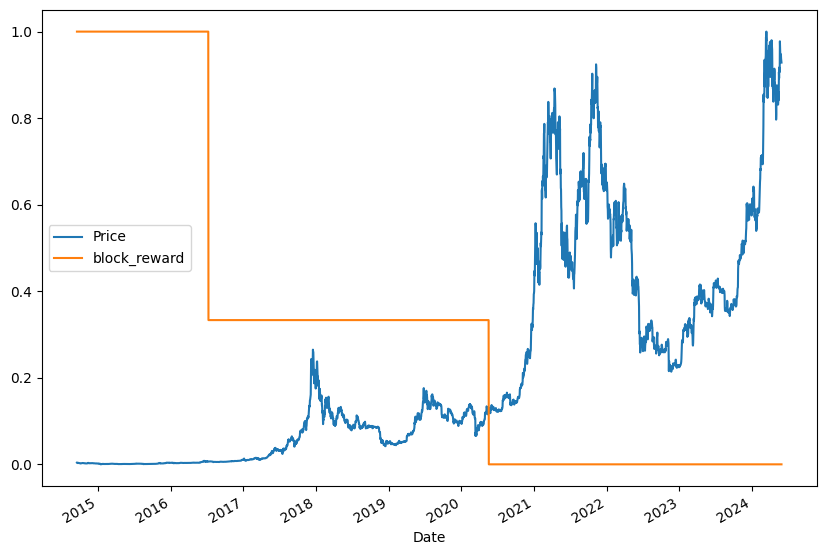

In [315]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [316]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [317]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [318]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-05-23,67929.56250,6.25,69122.33594,70136.53125,71448.19531,66278.36719,66940.80469,67051.87500,65231.58203
2024-05-24,68526.10156,6.25,67929.56250,69122.33594,70136.53125,71448.19531,66278.36719,66940.80469,67051.87500
2024-05-25,69265.94531,6.25,68526.10156,67929.56250,69122.33594,70136.53125,71448.19531,66278.36719,66940.80469
2024-05-26,68518.09375,6.25,69265.94531,68526.10156,67929.56250,69122.33594,70136.53125,71448.19531,66278.36719
2024-05-28,67865.85156,6.25,68518.09375,69265.94531,68526.10156,67929.56250,69122.33594,70136.53125,71448.19531


In [319]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [320]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [321]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2827, 2827, 707, 707)

In [322]:

tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
23/23 [==============================] - 1s 26ms/step - loss: 4096.9004 - val_loss: 3315.1421
Epoch 2/100
23/23 [==============================] - 0s 19ms/step - loss: 818.4283 - val_loss: 1028.8695
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 631.7314 - val_loss: 1008.0522
Epoch 4/100
23/23 [==============================] - 0s 19ms/step - loss: 557.8090 - val_loss: 860.6121
Epoch 5/100
23/23 [==============================] - 0s 19ms/step - loss: 520.8101 - val_loss: 855.1607
Epoch 6/100
23/23 [==============================] - 0s 19ms/step - loss: 506.1024 - val_loss: 819.2305
Epoch 7/100
23/23 [==============================] - 0s 19ms/step - loss: 486.6835 - val_loss: 763.4024
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 463.3969 - val_loss: 765.6339
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 452.0664 - val_loss: 813.2614
Epoch 10/100
23/23 [==============================] - 0s 19ms/

In [323]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

23/23 [==============================] - 0s 3ms/step - loss: 717.9921


717.9920654296875

In [324]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

23/23 [==============================] - 0s 3ms/step - loss: 605.2980


605.2979736328125

In [325]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

23/23 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20609.113, 20691.332, 20149.574, 20826.064, 21308.752, 21538.44 ,
       21162.377, 20776.465, 20391.664, 20120.562], dtype=float32)>

In [326]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 605.298,
 'mse': 1031783.6,
 'rmse': 1015.7675,
 'mape': 1.7857304,
 'mase': 0.99131495}

In [327]:
model_1_results

{'mae': 603.73175,
 'mse': 1037410.7,
 'rmse': 1018.53357,
 'mape': 1.771708,
 'mase': 0.9887499}

##2h.&nbsp;Model 7: N-BEATS algorithm

We're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [328]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [329]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [330]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [331]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.00975801 -0.58352315 -0.88930815 -0.11681476 -0.81297344  0.27818406
  0.7595267 ]
Forecast: -0.08882450312376022


We will be following the performance data pipeline in the tensorflow guide: https://www.tensorflow.org/guide/data_performance

In [332]:
HORIZON = 1
WINDOW_SIZE = 7

In [333]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [334]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [335]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2827, 2827, 707, 707)

In [336]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [337]:
# Values from N-BEATS paper: https://arxiv.org/pdf/1905.10437.pdf
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [338]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [339]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 769: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1176: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1276: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 4s, sys: 8.79 s, total: 5min 13s
Wall time: 6min


In [340]:
# Evaluate N-BEats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 600.5145


600.5145263671875

In [341]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20615.68 , 20621.492, 20117.277, 20930.678, 21194.365, 21478.58 ,
       21108.64 , 20748.393, 20275.473, 20111.854], dtype=float32)>

In [342]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 600.5145,
 'mse': 1013169.5,
 'rmse': 1006.5632,
 'mape': 1.7581116,
 'mase': 0.98348093}

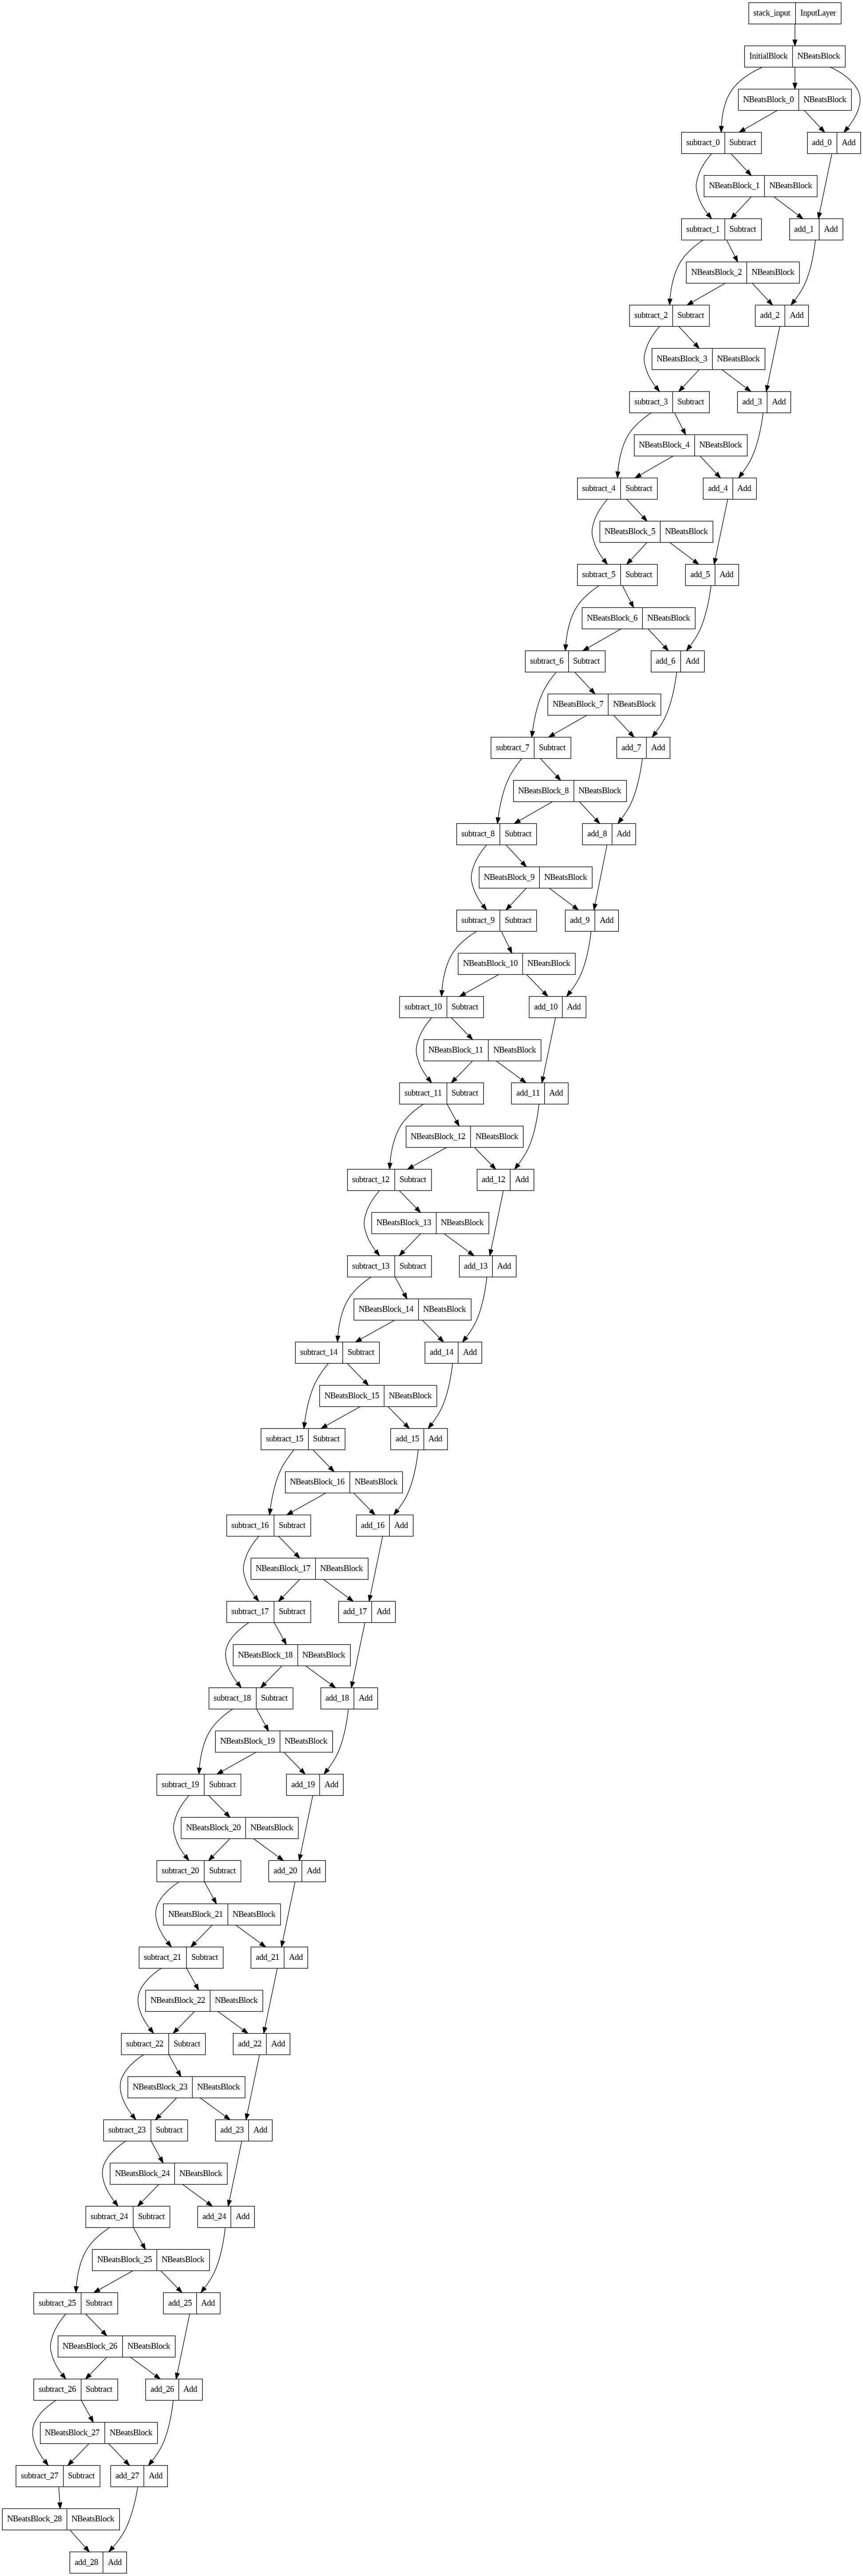

In [343]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

##2i.&nbsp; Model 8: Creating an ensemble (stacking different models together)

In [344]:
HORIZON, WINDOW_SIZE

(1, 7)

In [345]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [346]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 497: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 516: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 616: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 114: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 446: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 552: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 652: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 317: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 927: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing 

In [347]:
ensemble_models

In [348]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [349]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 81ms/step
CPU times: user 928 ms, sys: 31.7 ms, total: 960 ms
Wall time: 1.15 s


<tf.Tensor: shape=(15, 707), dtype=float32, numpy=
array([[20510.252, 20781.318, 20011.943, ..., 68647.914, 69313.52 ,
        68876.305],
       [20380.992, 20886.117, 20013.406, ..., 68657.19 , 68673.54 ,
        68740.3  ],
       [20566.547, 20674.39 , 20002.812, ..., 68830.02 , 69296.63 ,
        68595.65 ],
       ...,
       [20441.916, 20434.53 , 20332.053, ..., 67876.11 , 70165.72 ,
        68339.9  ],
       [20845.213, 20473.385, 20256.291, ..., 68112.72 , 70083.85 ,
        68453.48 ],
       [20552.414, 20502.934, 20096.275, ..., 68228.375, 69391.99 ,
        68510.87 ]], dtype=float32)>

In [350]:
ensemble_preds

<tf.Tensor: shape=(15, 707), dtype=float32, numpy=
array([[20510.252, 20781.318, 20011.943, ..., 68647.914, 69313.52 ,
        68876.305],
       [20380.992, 20886.117, 20013.406, ..., 68657.19 , 68673.54 ,
        68740.3  ],
       [20566.547, 20674.39 , 20002.812, ..., 68830.02 , 69296.63 ,
        68595.65 ],
       ...,
       [20441.916, 20434.53 , 20332.053, ..., 67876.11 , 70165.72 ,
        68339.9  ],
       [20845.213, 20473.385, 20256.291, ..., 68112.72 , 70083.85 ,
        68453.48 ],
       [20552.414, 20502.934, 20096.275, ..., 68228.375, 69391.99 ,
        68510.87 ]], dtype=float32)>

In [351]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20617.736, 20619.988, 20110.568, 20994.555, 21316.143, 21502.443,
       21111.566, 20747.879, 20311.71 , 20096.38 ], dtype=float32)>

In [352]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([20628.346, 20674.39 , 20027.836, 20963.115, 21321.746, 21517.621,
       21070.125, 20743.305, 20311.566, 20103.838], dtype=float32)

In [353]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 604.7737,
 'mse': 1014657.2,
 'rmse': 1007.30194,
 'mape': 1.7707067,
 'mase': 0.9904563}

In [354]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 605.8078,
 'mse': 1018544.8,
 'rmse': 1009.2298,
 'mape': 1.7727984,
 'mase': 0.9921499}

In [355]:
model_1_results

{'mae': 603.73175,
 'mse': 1037410.7,
 'rmse': 1018.53357,
 'mape': 1.771708,
 'mase': 0.9887499}

**Plotting the prediction intervals (uncertainty estimates) of our ensemble**

There are two major types of uncertainty in machine learning you should know about:

**Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty

**Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

In [356]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [357]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

In [358]:
X_test.index[:10]

DatetimeIndex(['2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
               '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

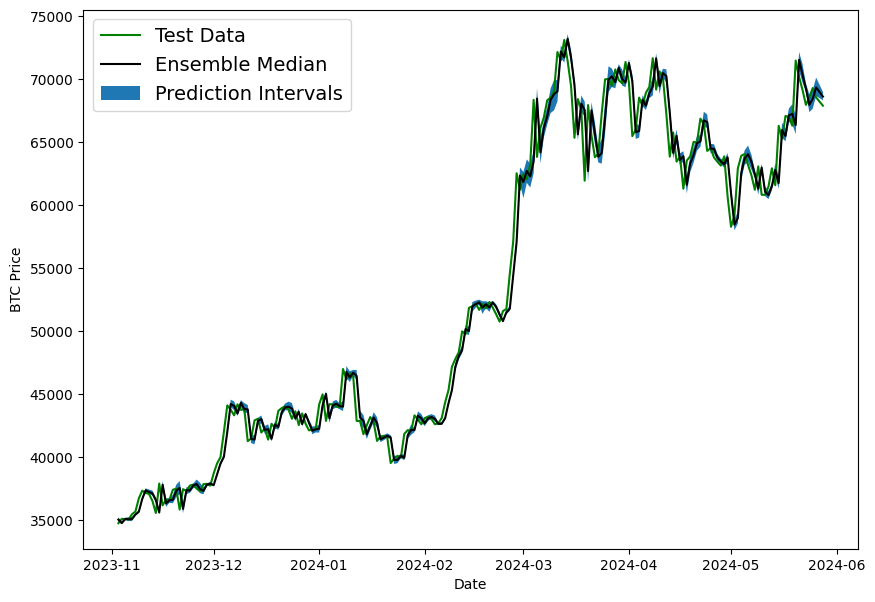

In [359]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

##2j.&nbsp;Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture. Let's now build a model which is capable of predicting into the future!

In [360]:
HORIZON = 1
WINDOW_SIZE = 7

In [361]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [362]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-05-23,67929.56250,6.25,69122.33594,70136.53125,71448.19531,66278.36719,66940.80469,67051.87500,65231.58203
2024-05-24,68526.10156,6.25,67929.56250,69122.33594,70136.53125,71448.19531,66278.36719,66940.80469,67051.87500
2024-05-25,69265.94531,6.25,68526.10156,67929.56250,69122.33594,70136.53125,71448.19531,66278.36719,66940.80469
2024-05-26,68518.09375,6.25,69265.94531,68526.10156,67929.56250,69122.33594,70136.53125,71448.19531,66278.36719
2024-05-28,67865.85156,6.25,68518.09375,69265.94531,68526.10156,67929.56250,69122.33594,70136.53125,71448.19531


In [363]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(3534, 3534)

In [364]:
X_all[:5], y_all[:5]

(array([[435.790985, 402.152008, 398.821014, 408.903992, 394.79599 ,
         424.440002, 457.334015],
        [423.204987, 435.790985, 402.152008, 398.821014, 408.903992,
         394.79599 , 424.440002],
        [411.574005, 423.204987, 435.790985, 402.152008, 398.821014,
         408.903992, 394.79599 ],
        [404.424988, 411.574005, 423.204987, 435.790985, 402.152008,
         398.821014, 408.903992],
        [399.519989, 404.424988, 411.574005, 423.204987, 435.790985,
         402.152008, 398.821014]]),
 array([423.204987, 411.574005, 404.424988, 399.519989, 377.181   ]))

In [365]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [366]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

**Make predictions into future**

In [367]:
# How many timestesp to predict into the future?
INTO_FUTURE = 30

In [368]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [369]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 52ms/step
Predicting on:
 [70136.53125 69122.33594 67929.5625  68526.10156 69265.94531 68518.09375
 67865.85156] -> Prediction: 70102.640625

1/1 [==============================] - 0s 17ms/step
Predicting on:
 [69122.33594  67929.5625   68526.10156  69265.94531  68518.09375
 67865.85156  70102.640625] -> Prediction: 69236.234375

1/1 [==============================] - 0s 18ms/step
Predicting on:
 [67929.5625   68526.10156  69265.94531  68518.09375  67865.85156
 70102.640625 69236.234375] -> Prediction: 69171.0

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [68526.10156  69265.94531  68518.09375  67865.85156  70102.640625
 69236.234375 69171.      ] -> Prediction: 69476.46875

1/1 [==============================] - 0s 25ms/step
Predicting on:
 [69265.94531  68518.09375  67865.85156  70102.640625 69236.234375
 69171.       69476.46875 ] -> Prediction: 69561.375

1/1 [==============================] - 0s 21ms/step
Predicting 

In [370]:
future_forecast

[70102.64,
 69236.234,
 69171.0,
 69476.47,
 69561.375,
 69451.64,
 69710.08,
 70355.25,
 69985.11,
 70136.805,
 70286.67,
 70379.32,
 70520.83,
 70758.89,
 70942.04,
 70872.14,
 71039.77,
 71170.875,
 71311.984,
 71474.94,
 71625.27,
 71724.125,
 71791.03,
 71950.39,
 72087.94,
 72233.53,
 72372.164,
 72491.484,
 72599.45,
 72719.27]

In [371]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [372]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2024-05-28 00:00:00')

In [373]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-05-29', '2024-05-30', '2024-05-31', '2024-06-01',
       '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05',
       '2024-06-06', '2024-06-07', '2024-06-08', '2024-06-09',
       '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13',
       '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17',
       '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21',
       '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25',
       '2024-06-26', '2024-06-27'], dtype='datetime64[D]')

In [374]:
bitcoin_prices.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21',
               '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-25',
               '2024-05-26', '2024-05-28'],
              dtype='datetime64[ns]', name='Date', length=3541, freq=None)

In [376]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

IndexError: list index out of range

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

We made some predictions for the next month, but how accurate are these predictions? Almost a week has passed and we can look into how close are predictions are to the real market price.

***** Resume Here when I return***

In [ ]:
#Downloaded the most recent prices and upload into a new dataframe
df1 = pd.read_csv('/content/gdrive/My Drive/BTC_current.csv',
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime
actual_btc = pd.DataFrame(df1["Adj Close"]).rename(columns={"Adj Close": "Actual_Price"})
actual_btc.tail(35)

In [ ]:
#Combine our forecasts into a dataframe
future_prediction = pd.DataFrame(future_forecast, next_time_steps)
future_prediction.index.name = 'Date'
future_prediction.rename(columns={future_prediction.columns[0]: "Predicted_Price" }, inplace = True)

In [ ]:
future_prediction.head(35)

,Predicted_Price
Date,
2022-07-02,19242.255859
2022-07-03,21053.570312
2022-07-04,20549.033203
2022-07-05,20225.351562
2022-07-06,19880.988281
2022-07-07,19731.296875
2022-07-08,19618.439453
2022-07-09,20108.015625
2022-07-10,20925.208984


In [ ]:
#merge the dataframes, we will do an inner join because we only care about the overlapping prices
df_prices = pd.merge(future_prediction, actual_btc, on = 'Date', how = 'inner')
#df_prices = df_prices[:-1]
df_prices

,Predicted_Price,Actual_Price
Date,,
2022-07-02,19242.255859,19242.255859
2022-07-03,21053.570312,19297.076172
2022-07-04,20549.033203,20231.261719
2022-07-05,20225.351562,20190.115234
2022-07-06,19880.988281,20548.246094
2022-07-07,19731.296875,21637.587891
2022-07-08,19618.439453,21731.117188
2022-07-09,20108.015625,21592.207031
2022-07-10,20925.208984,20860.449219


In [ ]:
#Create a new column to compare the differences
df_prices['Net Prediction'] = df_prices['Predicted_Price'] - df_prices['Actual_Price']
df_prices.round(6)

,Predicted_Price,Actual_Price,Net Prediction
Date,,,
2022-07-02,19242.255859,19242.255859,0.000000
2022-07-03,21053.570312,19297.076172,1756.494140
2022-07-04,20549.033203,20231.261719,317.771484
2022-07-05,20225.351562,20190.115234,35.236328
2022-07-06,19880.988281,20548.246094,-667.257813
2022-07-07,19731.296875,21637.587891,-1906.291016
2022-07-08,19618.439453,21731.117188,-2112.677735
2022-07-09,20108.015625,21592.207031,-1484.191406
2022-07-10,20925.208984,20860.449219,64.759765


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_prices['Actual_Price'][1:],df_prices['Predicted_Price'][1:],  squared=False) #Root Mean Squared Error without counting the baseline 07/02 date

2002.4553726027805

After 30 days, we can take a look at what we forecasted and compare it to the market value. It looks like we missed the mark quite a bit on most instances. A a root mean squared error of 2002.45 dollars means that on average our model is guessing 2002.45 above or below the actual price. That's a large window of money we could lose. Our predictions error also becomes consistently larger as we more time passes.  Should we believe in our model? Let's take a look at the turkey problem.

##2k.&nbsp;Model 10: Why forecasting is unreliable (the turkey problem 🦃)

In [ ]:
# Let's introduce a turkey prolbem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[21085.876953,
 21231.65625,
 21502.337891,
 21027.294922,
 20735.478516,
 20280.634766,
 20104.023438,
 19784.726563,
 19269.367188,
 192.42255859]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2022-06-23T00:00:00.000000000', '2022-06-24T00:00:00.000000000',
       '2022-06-25T00:00:00.000000000', '2022-06-26T00:00:00.000000000',
       '2022-06-27T00:00:00.000000000', '2022-06-28T00:00:00.000000000',
       '2022-06-29T00:00:00.000000000', '2022-06-30T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-07-02T00:00:00.000000000'],
      dtype='datetime64[ns]')

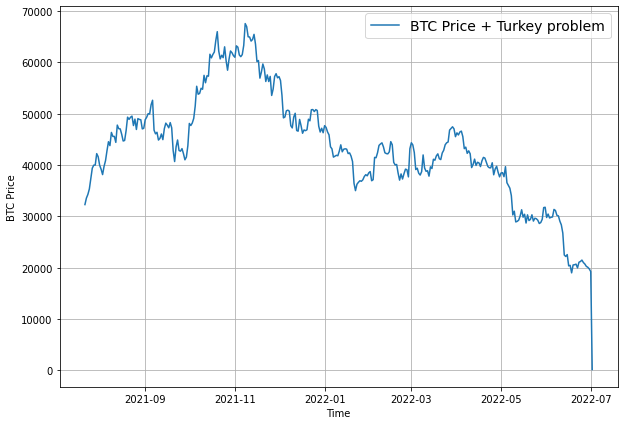

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2271, 568, 2271, 568)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1341.0385


1341.0384521484375

In [ ]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1280.5568


1280.5567626953125

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18058.45 , 18715.018, 19104.963, 19261.35 , 19429.707, 21066.865,
       22651.867, 23088.387, 23841.424, 23608.568], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 12445.257,
 'mape': 71.06075,
 'mase': 9.748878,
 'mse': 239724400.0,
 'rmse': 14877.634}

In [ ]:
model_1_results

{'mae': 1252.8757,
 'mape': 2.9917312,
 'mase': 1.0079564,
 'mse': 2967610.5,
 'rmse': 1722.6754}

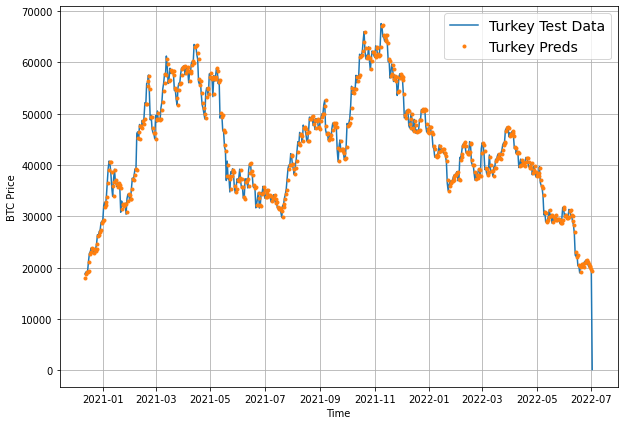

In [ ]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

#3.&nbsp;Model Comparison

In [ ]:
ensemble_results

{'mae': 1240.8575,
 'mape': 2.9632556,
 'mase': 0.99828756,
 'mse': 2930035.0,
 'rmse': 1711.7345}

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,1240.287964,2.910218e+06,1705.936157,2.955615,0.998534
model_1_dense_w7_h1,1252.875732,2.967610e+06,1722.675415,2.991731,1.007956
model_2_dense_w30_h1,1339.047974,3.236836e+06,1799.120850,3.180404,1.073502
model_3_dense_w30_h7,2682.349609,1.292904e+07,3065.061523,6.421487,2.142966
model_4_CONV1D,1260.206665,2.987818e+06,1728.530518,3.010562,1.013854
model_5_LSTM,1339.278198,3.217844e+06,1793.834839,3.198132,1.077468
model_6_multivariate,1252.760620,2.944443e+06,1715.937988,2.986269,1.007864
model_7_NBEATS,1252.593018,2.966989e+06,1722.494995,2.993098,1.007729
model_8_ensemble,1240.857544,2.930035e+06,1711.734497,2.963256,0.998288
model_10_turkey,12445.256836,2.397244e+08,14877.633789,71.060753,9.748878


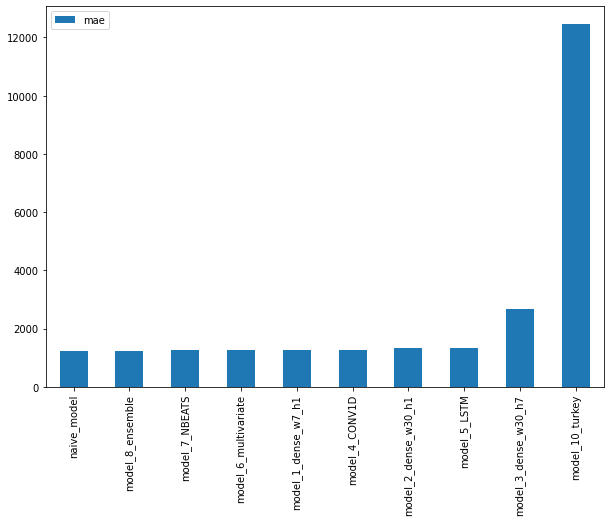

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");